<a href="https://colab.research.google.com/github/curbierel/ameliorationIA/blob/main/Shimumi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
import os
import random
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import tensorflow_datasets as tfd9

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# -----
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import decode_predictions

from tensorflow.keras import layers
import time

from keras.preprocessing.image import ImageDataGenerator

In [4]:
def temps():
  instantT=time.time
  return instantT


In [5]:
### Gestion de la graine

In [6]:
seed = 42

os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [7]:
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical

## Loading images and labels
(X_train, y_train) = tfds.load(
    "rock_paper_scissors",
    batch_size=-1,
    split='train',
    as_supervised=True,  # Include labels
)
(X_test, y_test) = tfds.load(
    "rock_paper_scissors",
    batch_size=-1,
    split='test',
    as_supervised=True,  # Include labels
)
## Resizing images
train_ds = tf.image.resize(X_train, (300, 300))
test_ds = tf.image.resize(X_test, (300, 300))

## Rescaling images

## Transforming labels to correct format
train_labels = to_categorical(y_train, num_classes=3)
test_labels = to_categorical(y_test, num_classes=3)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteHBRPOI/rock_paper_scissors-train.tfrecord


  0%|          | 0/2520 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteHBRPOI/rock_paper_scissors-test.tfrecord


  0%|          | 0/372 [00:00<?, ? examples/s]

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


On a bien 2 dataset, pour le train et le test

In [8]:
 print('On a ',len(train_ds),' images de train qui ont une shape de ',  train_ds[0].shape)
 print("Et ",len(test_ds)," de test qui ont aussi une shape de ",test_ds[0].shape)

On a  2520  images de train qui ont une shape de  (300, 300, 3)
Et  372  de test qui ont aussi une shape de  (300, 300, 3)


In [9]:
# Normalize pixel values to be between 0 and 1
train_ds=train_ds/255.0
test_ds=test_ds/255.0

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


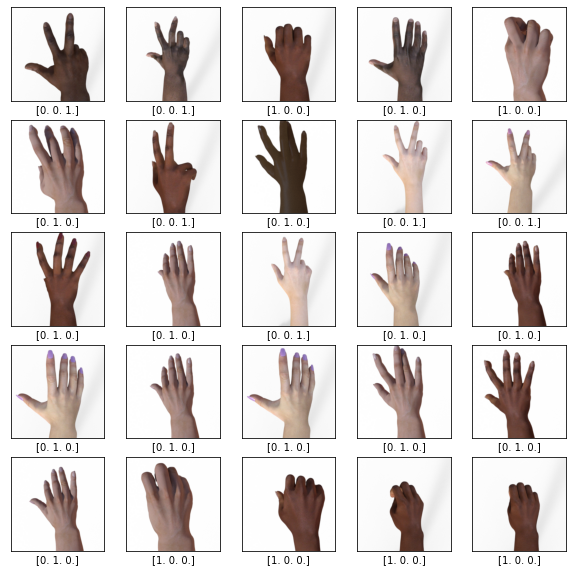

In [10]:
# Affichage des images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_ds[i])
    plt.xlabel(train_labels[i])
plt.show()

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'))
model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.2))

DATA AUGMENTATION

In [13]:
model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 random_flip (RandomFlip)    (None, 71, 71, 64)        0

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

history=model.fit(train_ds, train_labels,  steps_per_epoch=25,epochs=30, validation_split=0.3)

Epoch 1/30
25/25 [==============================] - 28s 350ms/step - loss: 1.4914 - accuracy: 0.3588 - val_loss: 1.0860 - val_accuracy: 0.3135
Epoch 2/30
25/25 [==============================] - 5s 199ms/step - loss: 1.0400 - accuracy: 0.4070 - val_loss: 0.9238 - val_accuracy: 0.4868
Epoch 3/30
25/25 [==============================] - 5s 200ms/step - loss: 0.7747 - accuracy: 0.6361 - val_loss: 0.8435 - val_accuracy: 0.6283
Epoch 4/30
25/25 [==============================] - 5s 202ms/step - loss: 0.7693 - accuracy: 0.6576 - val_loss: 0.6189 - val_accuracy: 0.7447
Epoch 5/30
25/25 [==============================] - 5s 201ms/step - loss: 0.5513 - accuracy: 0.7585 - val_loss: 0.4215 - val_accuracy: 0.8280
Epoch 6/30
25/25 [==============================] - 5s 203ms/step - loss: 0.3556 - accuracy: 0.8543 - val_loss: 0.2500 - val_accuracy: 0.9272
Epoch 7/30
25/25 [==============================] - 5s 201ms/step - loss: 0.2062 - accuracy: 0.9444 - val_loss: 0.1279 - val_accuracy: 0.9696
Epoch

In [16]:
train_ds.shape

TensorShape([2520, 300, 300, 3])

In [17]:
train_labels.shape

(2520, 3)

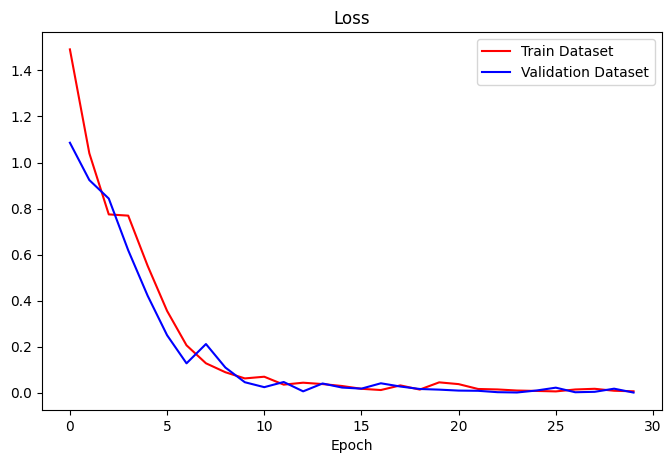

In [18]:
plt.figure(figsize=(8, 5), dpi=100)
plt.title("Loss")
plt.plot(history.history['loss'], 'r',label="Train Dataset")
plt.plot(history.history['val_loss'], 'b',label="Validation Dataset")
plt.xlabel("Epoch")
plt.legend()
plt.show()

# Nouvelle section

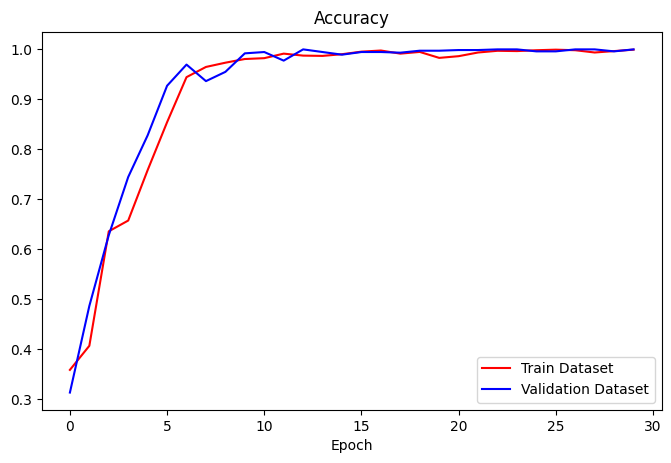

In [19]:
plt.figure(figsize=(8, 5), dpi=100)
plt.title("Accuracy")
plt.plot(history.history['accuracy'], 'r',label="Train Dataset")
plt.plot(history.history['val_accuracy'], 'b', label="Validation Dataset")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [20]:
model.evaluate(train_ds, train_labels)

79/79 [==============================] - 3s 37ms/step - loss: 0.0022 - accuracy: 0.9996


[0.0022414221893996, 0.9996031522750854]

In [21]:
y_predict_train = np.argmax(model.predict(train_ds), axis=-1)

In [22]:
print(y_predict_train)

[2 2 0 ... 1 1 1]


In [23]:
train_labels=np.argmax(train_labels,axis=-1)

In [24]:
print(train_labels)

[2 2 0 ... 1 1 1]


In [25]:
import os
import random

import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.preprocessing.image import ImageDataGenerator

In [26]:
cm = confusion_matrix(train_labels, y_predict_train, normalize='true')

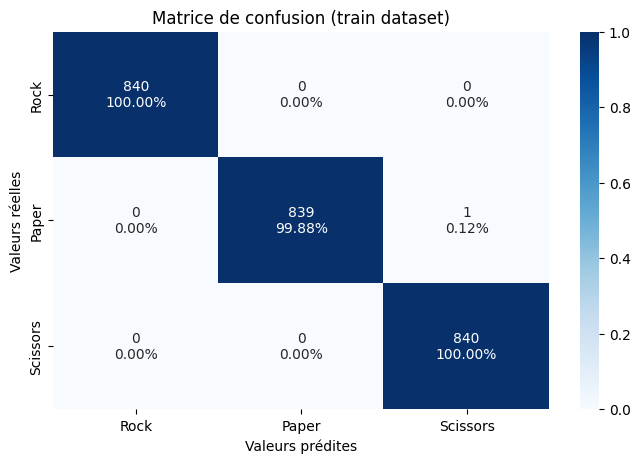

In [27]:
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(train_labels, y_predict_train, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(train_labels, y_predict_train, normalize='true').flatten()]

box_labels = [f"{v1}{v2}" for v1, v2 in zip(counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (train dataset)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=["Rock", "Paper", "Scissors"],
            yticklabels=["Rock", "Paper", "Scissors"])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()

In [28]:
model.evaluate(test_ds, test_labels)

12/12 [==============================] - 0s 35ms/step - loss: 0.8898 - accuracy: 0.9005


[0.8898046612739563, 0.9005376100540161]

In [29]:
y_predict_test = np.argmax(model.predict(test_ds), axis=-1)

In [30]:
test_labels=np.argmax(test_labels,axis=-1)

In [31]:
cm = confusion_matrix(test_labels, y_predict_test, normalize='true')

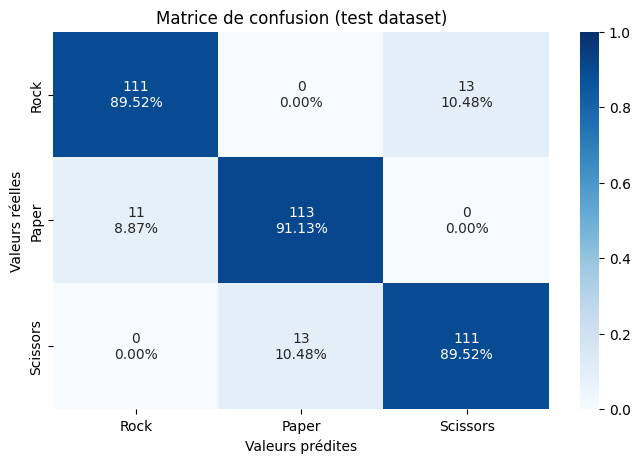

In [32]:
counts = ["{0:0.0f}\n".format(value) for value in confusion_matrix(test_labels, y_predict_test, normalize=None).flatten()]
percentages = ["{0:.2%}".format(value) for value in confusion_matrix(test_labels, y_predict_test, normalize='true').flatten()]

box_labels = [f"{v1}{v2}" for v1, v2 in zip(counts, percentages)]
box_labels = np.asarray(box_labels).reshape(cm.shape[0],cm.shape[1])

plt.figure(figsize=(8,5), dpi=100)

plt.title("Matrice de confusion (test dataset)")

sns.heatmap(cm,
            vmin=0.0,
            vmax=1.0,
            cmap='Blues',
            annot=box_labels,
            fmt='',
            xticklabels=["Rock", "Paper", "Scissors"],
            yticklabels=["Rock", "Paper", "Scissors"])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

plt.show()